Name: Dwi Fitria Astari Lubis

MOVIE RATING PREDICTION WITH PYTHON

1. Build a model that predicts the rating of a movie based on features like genre, director, and actors. 
2. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
3. Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [ ]:
#Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\CODSOFT\\CODSOFT\\5. Movie Rating Prediction\\IMDb Movies India2.csv", encoding='ISO-8859-1')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


DATA VISUALIZATION

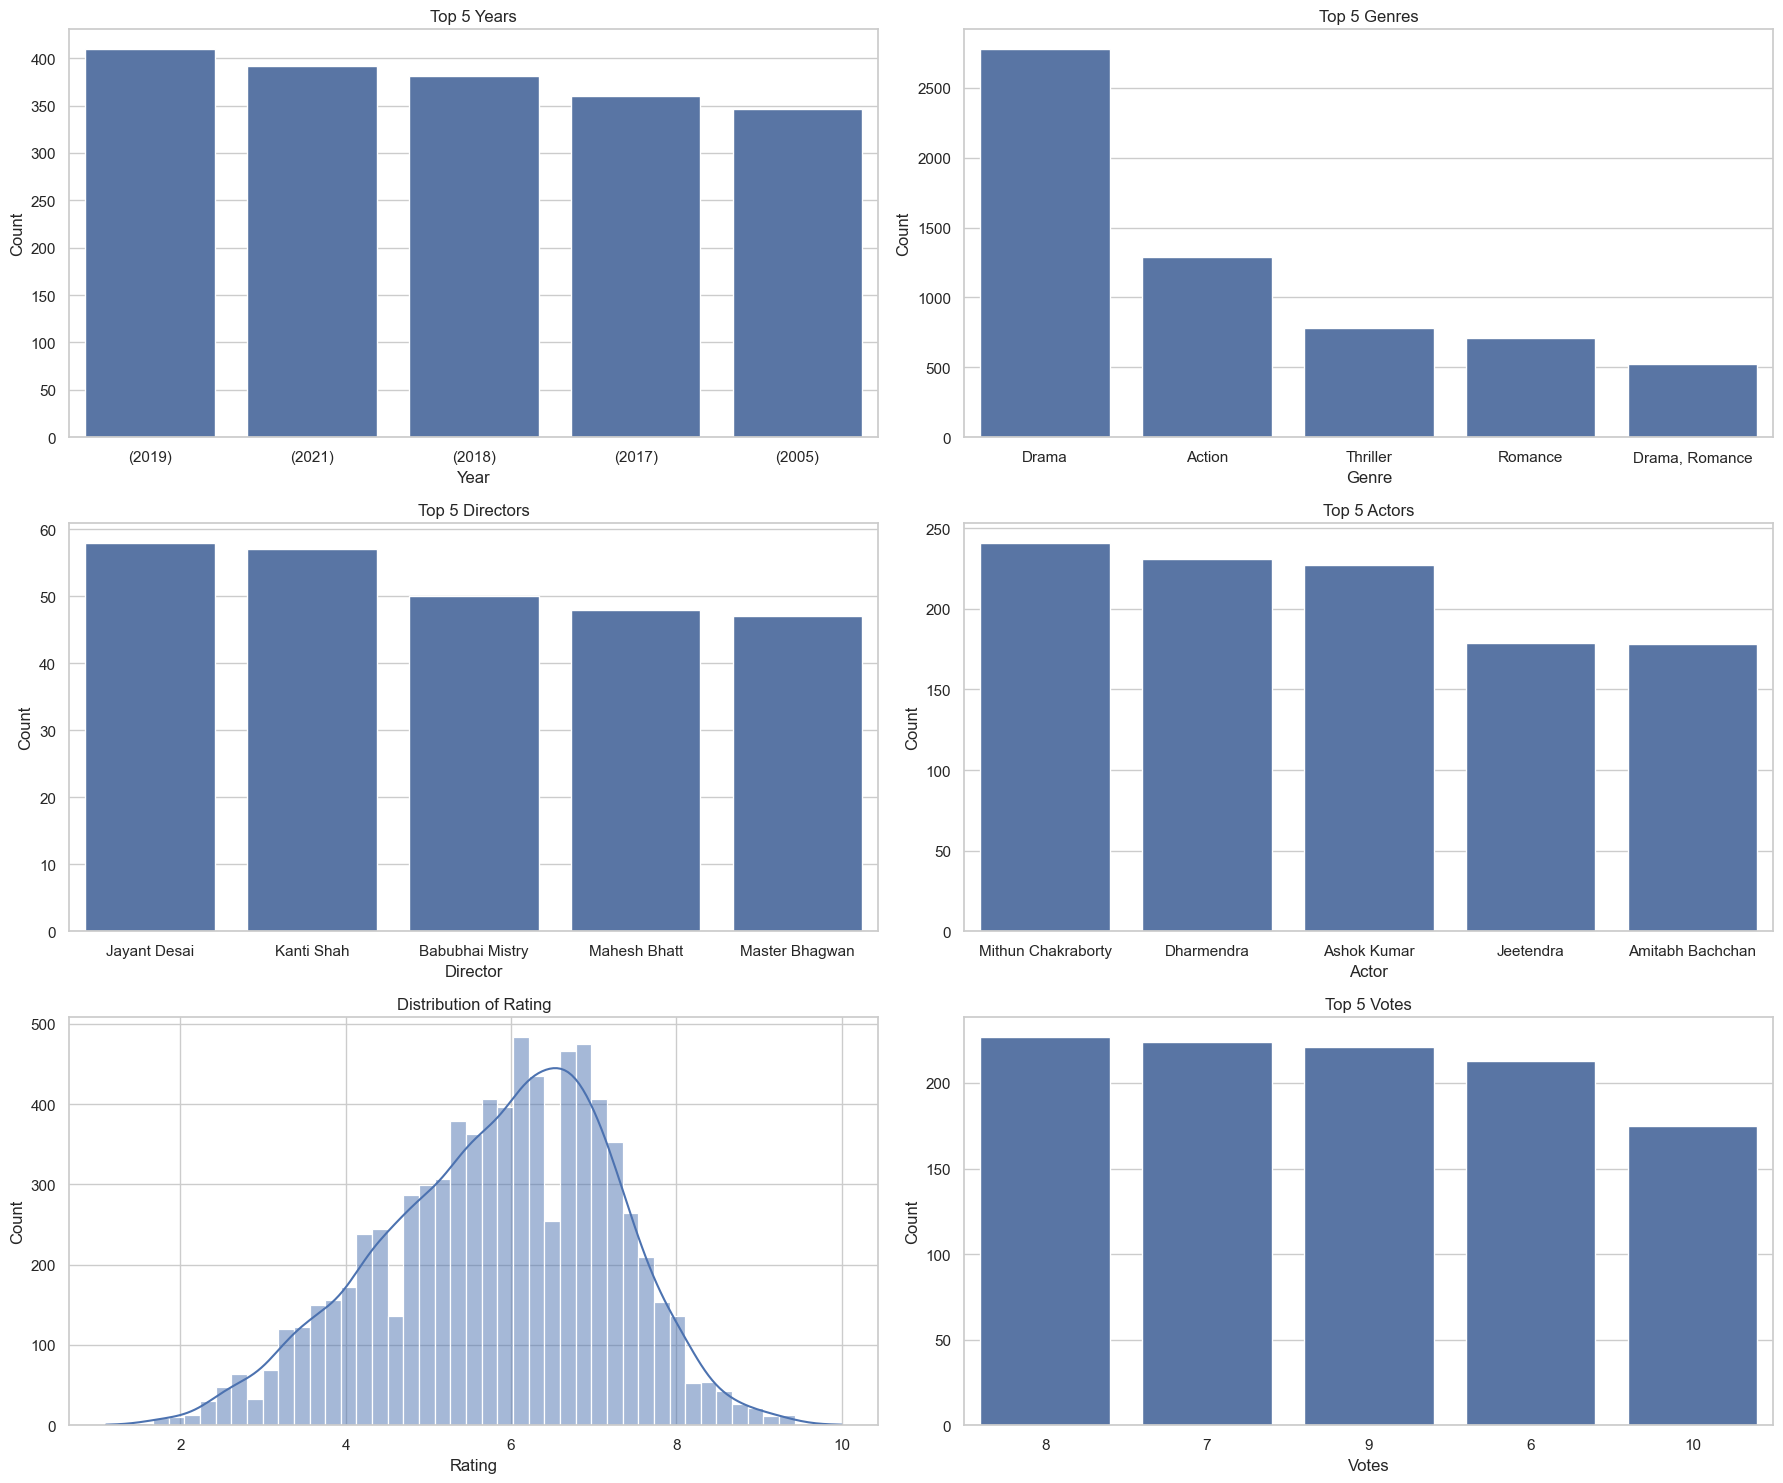

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Plot top 5 Years
top_5_years = df['Year'].value_counts().nlargest(5)
sns.barplot(x=top_5_years.index, y=top_5_years.values, ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Count')

# Plot top 5 Genres
top_5_genres = df['Genre'].value_counts().nlargest(5)
sns.barplot(x=top_5_genres.index, y=top_5_genres.values, ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Genres')
axes[0, 1].set_xlabel('Genre')
axes[0, 1].set_ylabel('Count')

# Plot top 5 Directors
top_5_directors = df['Director'].value_counts().nlargest(5)
sns.barplot(x=top_5_directors.index, y=top_5_directors.values, ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Directors')
axes[1, 0].set_xlabel('Director')
axes[1, 0].set_ylabel('Count')

# Combine Actor 1, Actor 2, Actor 3 and plot top 5 Actors
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_5_actors = all_actors.value_counts().nlargest(5)
sns.barplot(x=top_5_actors.index, y=top_5_actors.values, ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Actors')
axes[1, 1].set_xlabel('Actor')
axes[1, 1].set_ylabel('Count')

# Plot distribution of Rating
sns.histplot(df['Rating'].dropna(), kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Rating')
axes[2, 0].set_xlabel('Rating')
axes[2, 0].set_ylabel('Count')

# Plot top 5 Votes
top_5_votes = df['Votes'].value_counts().nlargest(5)
sns.barplot(x=top_5_votes.index, y=top_5_votes.values, ax=axes[2, 1])
axes[2, 1].set_title('Top 5 Votes')
axes[2, 1].set_xlabel('Votes')
axes[2, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

1. The distribution of ratings follows a roughly normal distribution (bell curve), meaning that most ratings are clustered around the average.
2. The curve is centered between 6 and 8.

In [ ]:
#check missing values
missing_values = df.isnull().sum()
print(missing_values)

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [51]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [52]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
# 2. Preprocessing Data
# Drop rows with missing values in Rating and Votes
df.dropna(subset=['Rating', 'Votes'], inplace=True)

# Convert Rating to numeric
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

# Convert Rating to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert Duration to numeric
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [ ]:
# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna('Unknown')

In [ ]:
# limit the number of categories in categorical columns
max_categories = 20  # Maximum number of categories to keep in each column
for col in categorical_cols:
    top_categories = df[col].value_counts().nlargest(max_categories).index
    df[col] = df[col].where(df[col].isin(top_categories), 'Other')

In [ ]:
# Encode categorical columns
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

In [62]:
# Debugging
print(f"Shape of encoded_features: {encoded_features.shape}")
feature_names = encoder.get_feature_names_out(categorical_cols)
print(f"Length of feature_names: {len(feature_names)}")


Shape of encoded_features: (7919, 105)
Length of feature_names: 105


In [ ]:
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), index=df.index, columns=feature_names)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
# Prepare features and target
features = encoded_df.columns
target = 'Rating'

In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [ ]:
# 3. Train and Evaluate Models
# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Linear SVR': LinearSVR(dual='auto', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [ ]:
# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-" * 30)

Model: Linear Regression
MAE: 1.0071744066360973
MSE: 1.5973587385232249
RMSE: 1.2638665825644828
------------------------------
Model: Random Forest Regression
MAE: 1.0131066110646356
MSE: 1.6162774392377943
RMSE: 1.2713290051114992
------------------------------
Model: Gradient Boosting Regression
MAE: 1.0194529337415648
MSE: 1.621279869127818
RMSE: 1.27329488694796
------------------------------
Model: Linear SVR
MAE: 1.003444878789515
MSE: 1.6172427688035864
RMSE: 1.2717086021583666
------------------------------


Linear SVR is the best model based on the given evaluation metrics. This shows that SVR is able to provide the most accurate rating predictions.

Linear SVR has the lowest MAE (1.00344) among all the models. This means that, on average, its predictions are closest to the actual ratings.

In [ ]:
# Tuning Hyperparameter dengan GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0, 0.1, 0.2],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

linear_svr = LinearSVR(dual='auto', random_state=42)
grid_search = GridSearchCV(linear_svr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Hyperparameter terbaik:", grid_search.best_params_)

best_linear_svr = grid_search.best_estimator_
y_pred = best_linear_svr.predict(X_test)


c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the numb

Hyperparameter terbaik: {'C': 0.1, 'epsilon': 0.2, 'loss': 'epsilon_insensitive'}


c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# training the best model
best_linear_svr = LinearSVR(C=0.1, epsilon=0.2, loss='epsilon_insensitive', dual='auto', random_state=42)
best_linear_svr.fit(X_train, y_train)

LinearSVR(C=0.1, epsilon=0.2, random_state=42)

In [ ]:
# Evaluate the best model
y_pred = best_linear_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1.0025337808676422
MSE: 1.6123035799049115
RMSE: 1.2697651672277483


MAE sebesar 1.0025 menunjukkan bahwa rata-rata prediksi rating film meleset sekitar 1.0025 poin dari rating aktual. Ini adalah hasil yang cukup baik, menunjukkan bahwa model memiliki akurasi yang cukup tinggi.

MSE sebesar 1.6123 dan RMSE sebesar 1.2698 memberikan informasi tentang sebaran kesalahan prediksi. Nilai yang relatif rendah menunjukkan bahwa kesalahan prediksi tidak terlalu besar dan model memiliki stabilitas yang baik.

Model Linear SVR dengan hyperparameter terbaik (C=0.1, epsilon=0.2, loss='epsilon_insensitive') memberikan prediksi rating film yang cukup akurat.

In [72]:
# Extract feature importances from the best LinearSVR model
feature_importances = best_linear_svr.coef_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importances_df.head(10))

                          Feature  Importance
11              Genre_Documentary    1.408042
47              Actor 1_Dev Anand    1.042406
24  Director_Hrishikesh Mukherjee    0.938466
14  Genre_Drama, Musical, Romance    0.843941
12                    Genre_Drama    0.744789
36        Director_Shakti Samanta    0.698556
21       Director_Basu Chatterjee    0.664552
78        Actor 2_Sharmila Tagore    0.642406
46            Actor 1_Ashok Kumar    0.596966
13            Genre_Drama, Family    0.592276


1. The genre "Documentary" and actor "Dev Anand" have the biggest impact.
2. Directors "Hrishikesh Mukherjee", "Shakti Samanta" and "Basu Chatterjee" also have significant influence.
3. The actress "Sharmila Tagore" and actor "Ashok Kumar" also have a significant influence.
4. Genre combinations are also an important factor.